In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

c:\Users\micha\anaconda3\envs\UVACapstone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
naics_df  = pd.read_csv('./data/cbp/patents_cbp_2_digit_naics_all_years_base.csv', dtype={'GeoFips':'string', 'year':'Int64'},low_memory=False)

In [3]:
naics_df.head()

,patent_number,assignee,grant_year,application_year,application_number,GEOID,ipc_section,team_size,inventors,men_inventors,...,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base
0,7472428,"NIKE, INC.",2009.0,2004,10814594,41067,A,2,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7472496,"NIKE, INC.",2009.0,2005,11055158,41067,A,2,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7472634,"SD3, LLC",2009.0,2004,10923290,41067,B,3,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7474419,FEI COMPANY,2009.0,2006,11590583,41067,G,6,6,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7474972,"TEKTRONIX, INC.",2009.0,2007,11690797,41067,G,3,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
naics_df.columns

Index(['patent_number', 'assignee', 'grant_year', 'application_year',
       'application_number', 'GEOID', 'ipc_section', 'team_size', 'inventors',
       'men_inventors', 'women_inventors', 'already_granted',
       'Agriculture_Forestry_Fishing_Hunting',
       'Mining_Quarrying_and_Oil_Gas_Extraction', 'Utilities', 'Construction',
       'Manufacturing', 'Wholesale_Trade', 'Retail_Trade',
       'Transportation_Warehousing', 'Information', 'Finance_Insurance',
       'Real_Estate_Rental_Leasing',
       'Professional_Scientific_and_Technical_Services',
       'Management_of_Companies_Enterprises',
       'Administrative_Support_Waste_Management_Remediation_Services',
       'Educational_Services', 'Health_Care_Social_Assistance',
       'Arts_Entertainment_and_Recreation', 'Accommodation_Food_Services',
       'Other_Services_except_Public_Administration', 'qp1', 'ap', 'est',
       'year', '99', 'Agriculture_Forestry_Fishing_Hunting_base',
       'Mining_Quarrying_and_Oil_Gas_Extr

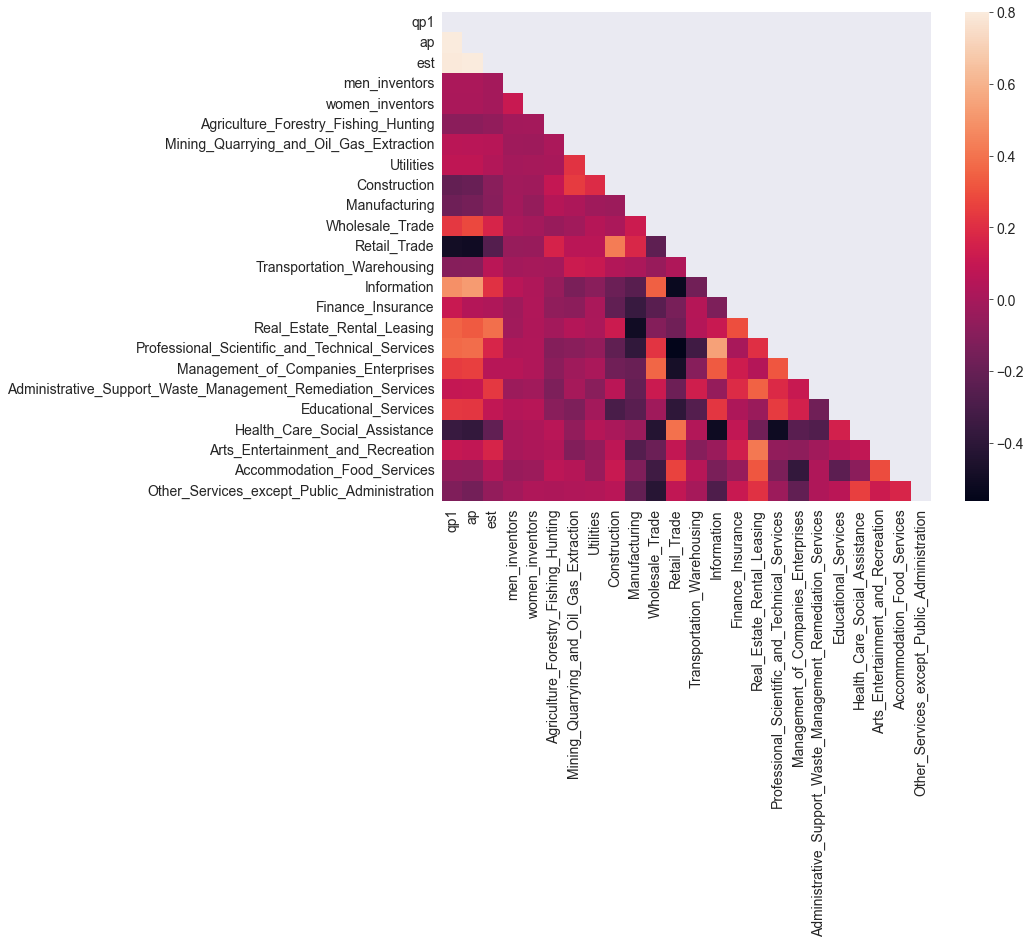

In [5]:
#raw-materials list
lq_data = ['qp1', 'ap', 'est','men_inventors','women_inventors','Agriculture_Forestry_Fishing_Hunting',
       'Mining_Quarrying_and_Oil_Gas_Extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale_Trade',
       'Retail_Trade', 'Transportation_Warehousing',
       'Information', 'Finance_Insurance',
       'Real_Estate_Rental_Leasing',
       'Professional_Scientific_and_Technical_Services',
       'Management_of_Companies_Enterprises',
       'Administrative_Support_Waste_Management_Remediation_Services',
       'Educational_Services', 'Health_Care_Social_Assistance',
       'Arts_Entertainment_and_Recreation',
       'Accommodation_Food_Services',
       'Other_Services_except_Public_Administration']
#getting the correlation matrix
corrmat = naics_df[lq_data].corr()
#setting the size of plot
fig = plt.figure(figsize = (12, 9))
#masking the upper traingle part since matrix is symmetric(repetitive) 
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = False)
plt.show()

Agriculture_Forestry_Fishing_Hunting_base
Mining_Quarrying_and_Oil_Gas_Extraction_base
Utilities_base
Construction_base
Manufacturing_base
Wholesale_Trade_base
Retail_Trade_base
Transportation_Warehousing_base
Information_base
Finance_Insurance_base
Real_Estate_Rental_Leasing_base
Professional_Scientific_and_Technical_Services_base
Management_of_Companies_Enterprises_base
Administrative_Support_Waste_Management_Remediation_Services_base
Educational_Services_base
Health_Care_Social_Assistance_base
Arts_Entertainment_and_Recreation_base
Accommodation_Food_Services_base
Other_Services_except_Public_Administration_base


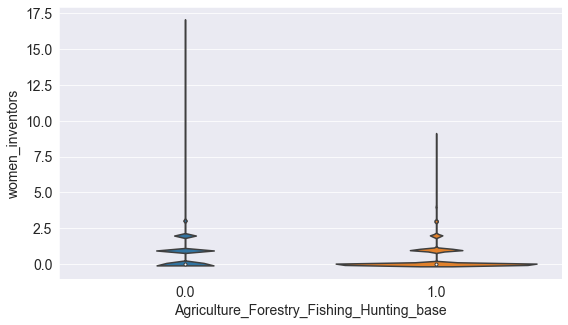

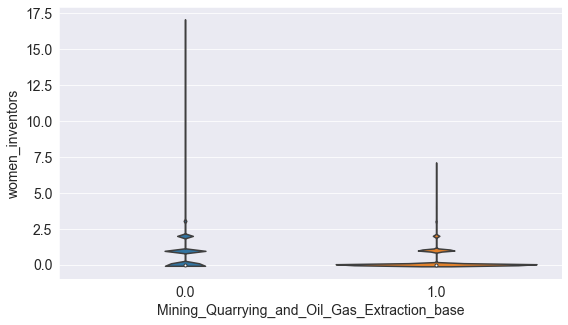

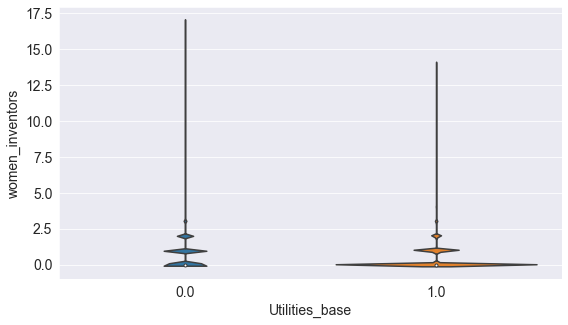

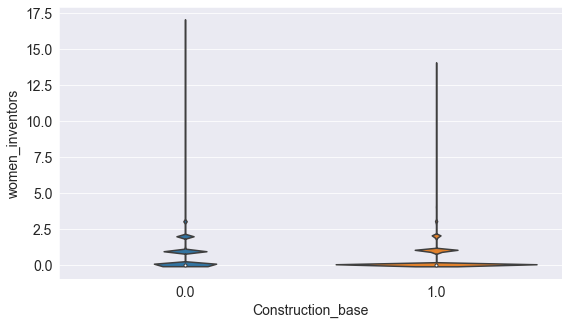

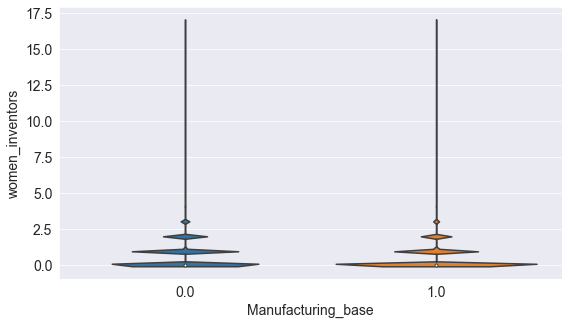

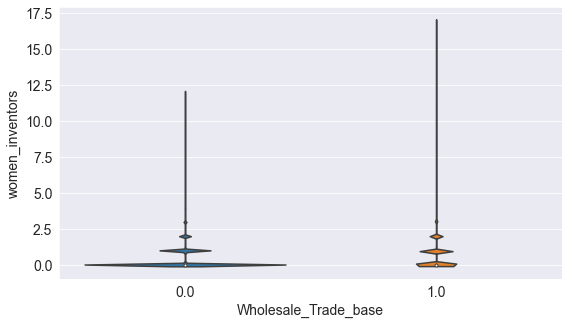

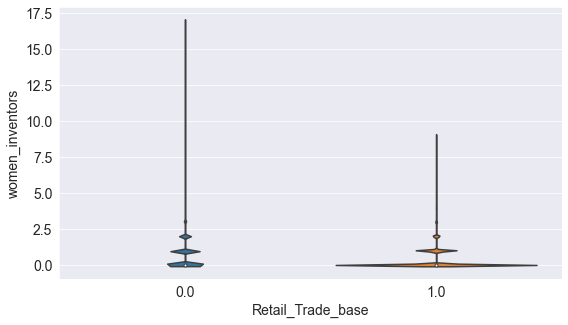

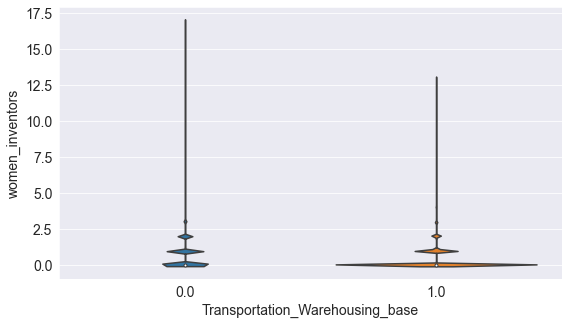

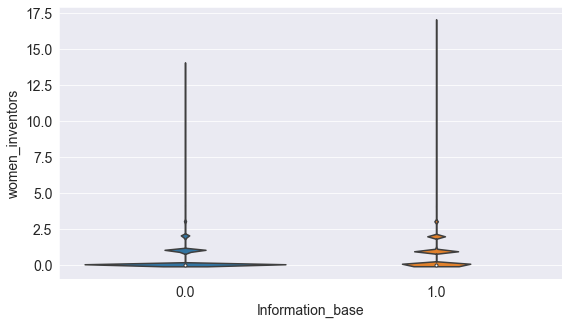

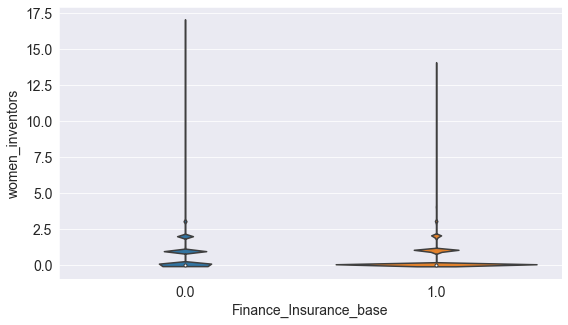

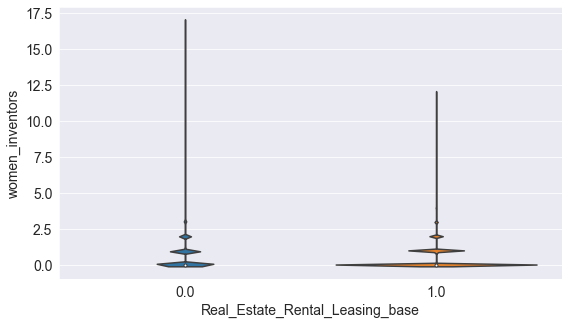

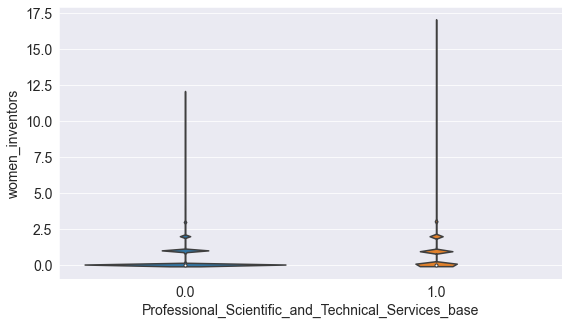

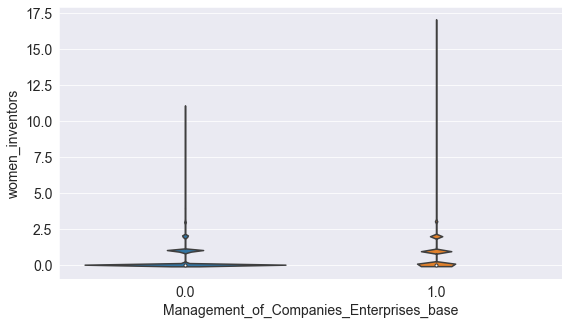

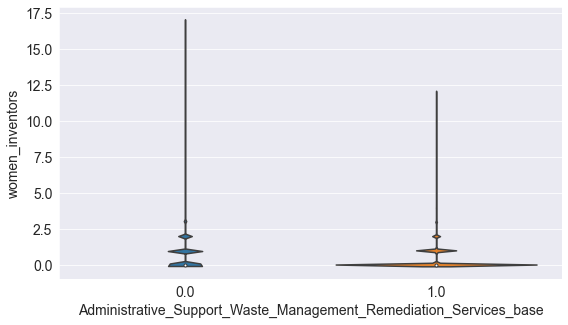

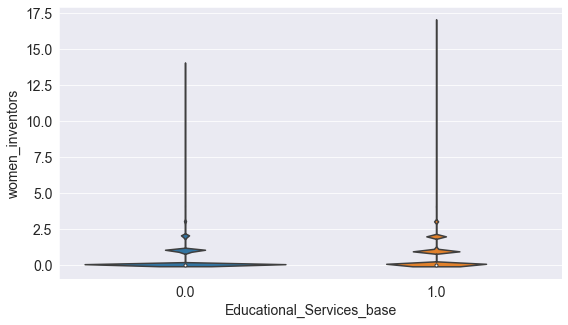

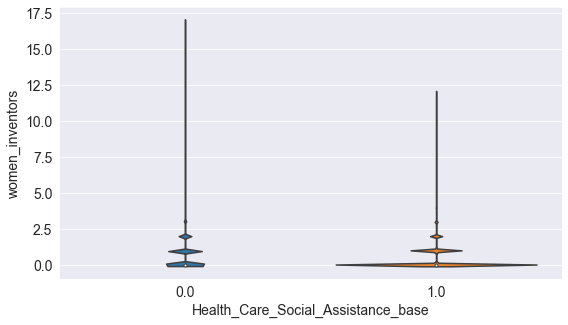

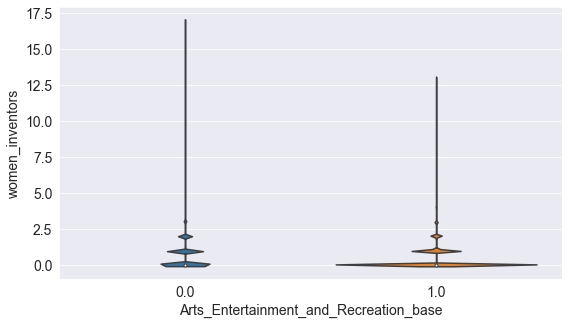

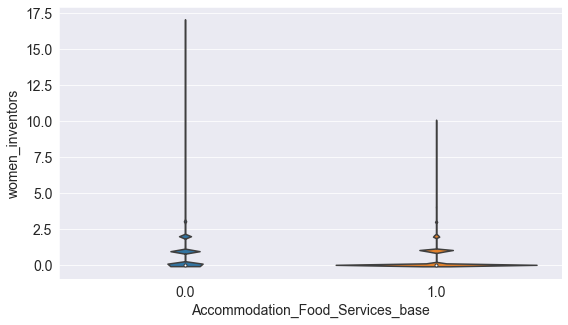

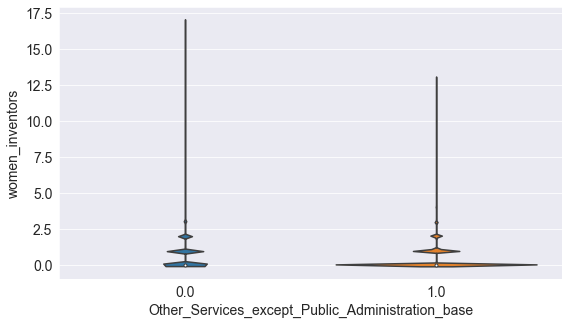

In [7]:
# Examining the difference between patents and the number of women inventors by NAICS Code

base_data = [
       'Agriculture_Forestry_Fishing_Hunting_base',
       'Mining_Quarrying_and_Oil_Gas_Extraction_base', 'Utilities_base',
       'Construction_base', 'Manufacturing_base', 'Wholesale_Trade_base',
       'Retail_Trade_base', 'Transportation_Warehousing_base',
       'Information_base', 'Finance_Insurance_base',
       'Real_Estate_Rental_Leasing_base',
       'Professional_Scientific_and_Technical_Services_base',
       'Management_of_Companies_Enterprises_base',
       'Administrative_Support_Waste_Management_Remediation_Services_base',
       'Educational_Services_base', 'Health_Care_Social_Assistance_base',
       'Arts_Entertainment_and_Recreation_base',
       'Accommodation_Food_Services_base',
       'Other_Services_except_Public_Administration_base'
       ]
#getting the correlation matrix

for i in base_data:
    print(i)    
    # ax = sns.boxplot(x=i, y="women_inventors", data=naics_df.query("already_granted == 1"))
    plt.figure(i)
    # sns.countplot(x=col, data=df1)
#     sns.boxplot(x=i, y="women_inventors", data=naics_df.query("already_granted == 1"))
    sns.violinplot(x=i, y="women_inventors", data=naics_df.query("already_granted == 1"))

In [ ]:
# Examining the difference between patents and the number of establishments by NAICS Code
for i in base_data:
    print(i)    
    # ax = sns.boxplot(x=i, y="women_inventors", data=naics_df.query("already_granted == 1"))
    plt.figure(i)
    # sns.countplot(x=col, data=df1)
    sns.boxplot(x=i, y="est", data=naics_df.query("already_granted == 1"))

In [ ]:
# Examining the difference between patents and the number of establishments by NAICS Code
for i in base_data:
    print(i)    
    # ax = sns.boxplot(x=i, y="women_inventors", data=naics_df.query("already_granted == 1"))
    plt.figure(i)
    # sns.countplot(x=col, data=df1)
    sns.boxplot(x=i, y="ap", data=naics_df.query("already_granted == 1"))

In [ ]:
# _base_data = [
#        'Agriculture_Forestry_Fishing_Hunting_base'       
#        ]
# Examining the difference between patents and the number of establishments by NAICS Code
for i in base_data:
    print(i)    
    sex_by_year_and_naics = naics_df.query(f"already_granted == 1").groupby(['application_year', i], as_index = False).\
    agg({'women_inventors':'mean'})

    plt.figure(i)
    sns.lineplot(x = "application_year", y = "women_inventors", data=sex_by_year_and_naics, hue=i)



In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

# import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})

import plotly.express as px
fig = px.choropleth(map_data, geojson=counties, locations='GEOID', color='size',
                           color_continuous_scale="Viridis",
                           # gives the range of the color scale
                           range_color=(0,50000),
                           # maybe county, state (especially for northeast)
                           # hover_data = 
                           scope="usa",
                           labels={'size':'Number of Patent Applications'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
for i in base_data:
    print(i)    
    sex_by_year_and_naics = naics_df.query(f"already_granted == 1").groupby(['application_year', i], as_index = False).\
    agg({'men_inventors':'mean'})

    plt.figure(i)
    sns.lineplot(x = "application_year", y = "women_inventors", data=sex_by_year_and_naics, hue=i)

Agriculture_Forestry_Fishing_Hunting_base
Mining_Quarrying_and_Oil_Gas_Extraction_base
Utilities_base
Construction_base
Manufacturing_base
Wholesale_Trade_base
Retail_Trade_base
Transportation_Warehousing_base
Information_base
Finance_Insurance_base
Real_Estate_Rental_Leasing_base
Professional_Scientific_and_Technical_Services_base
Management_of_Companies_Enterprises_base
Administrative_Support_Waste_Management_Remediation_Services_base
Educational_Services_base
Health_Care_Social_Assistance_base
Arts_Entertainment_and_Recreation_base
Accommodation_Food_Services_base
Other_Services_except_Public_Administration_base


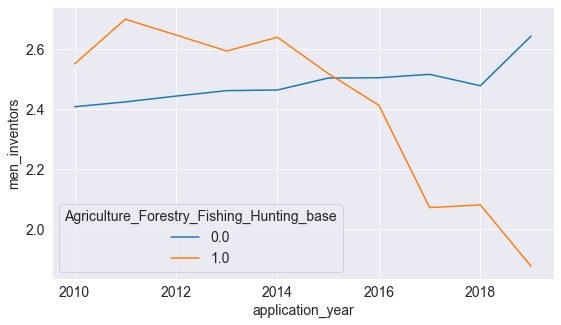

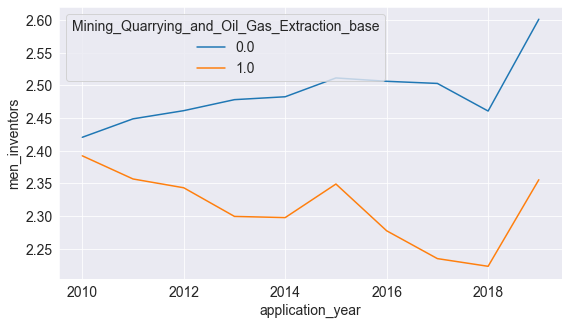

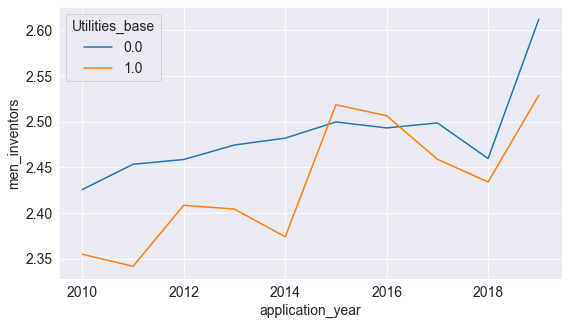

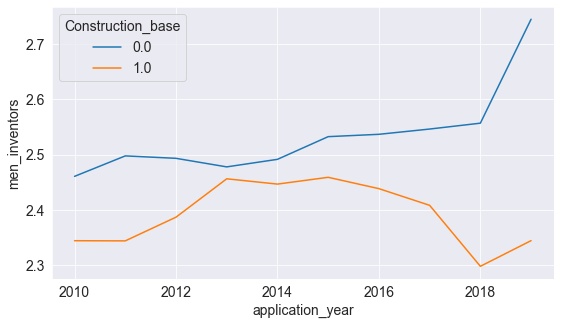

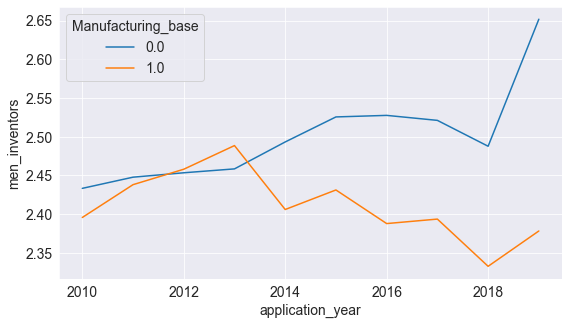

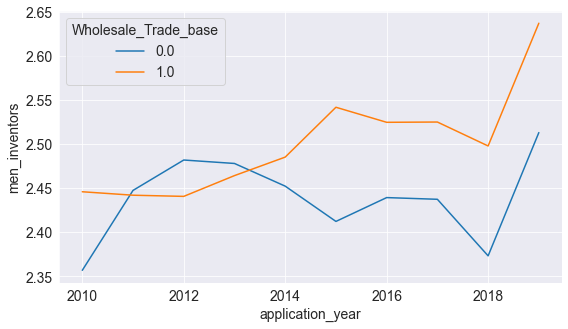

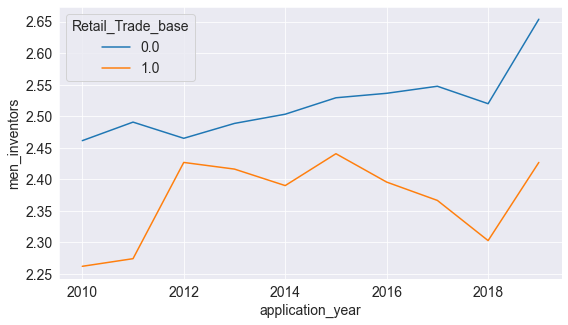

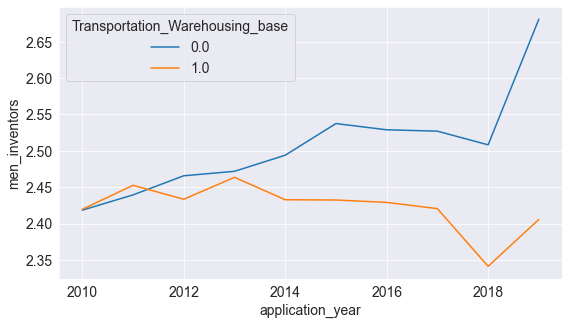

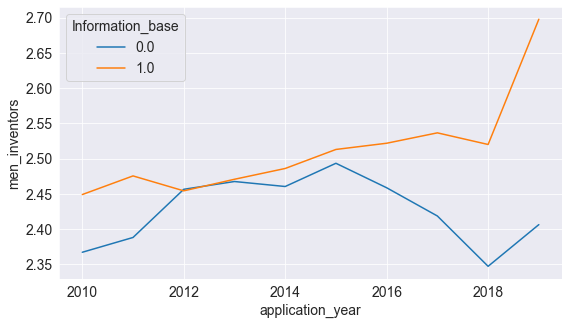

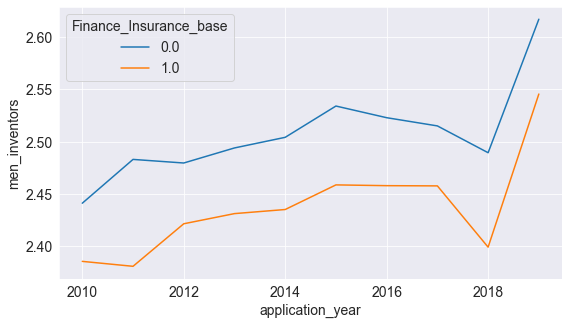

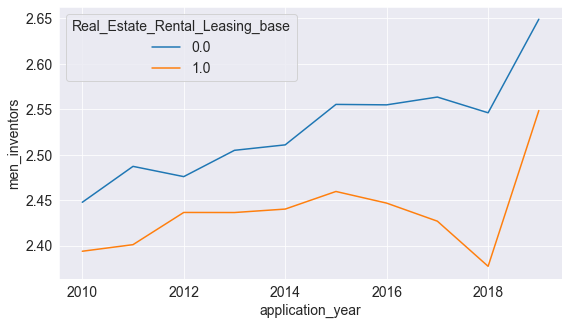

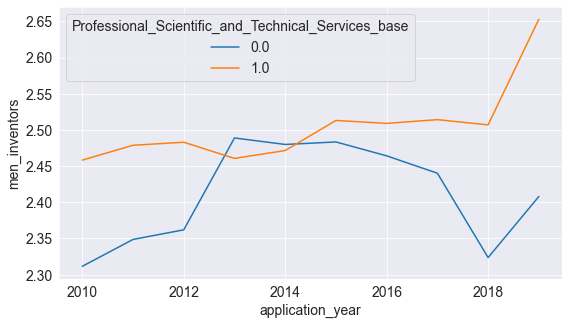

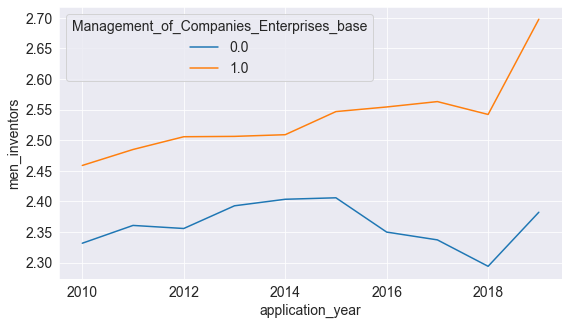

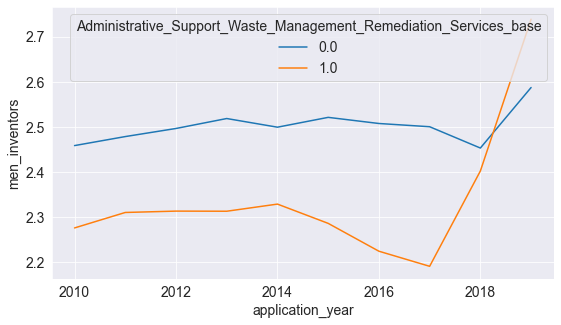

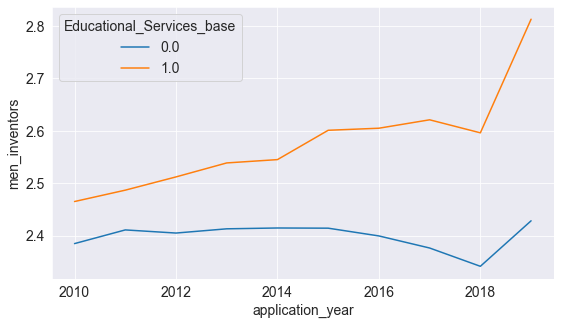

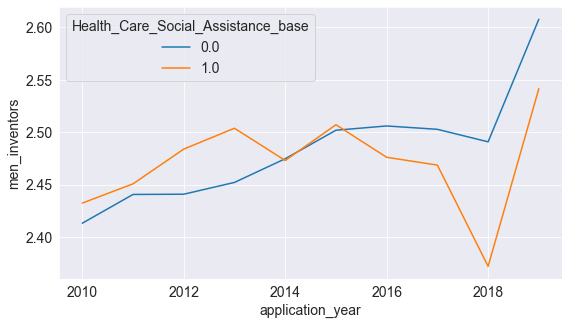

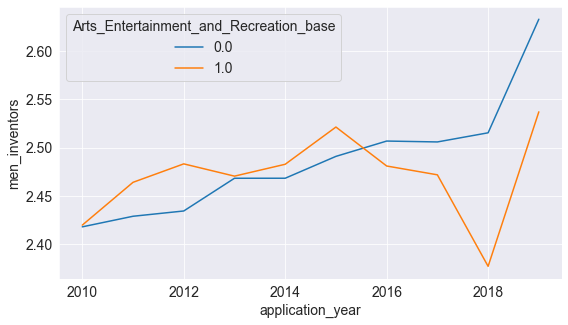

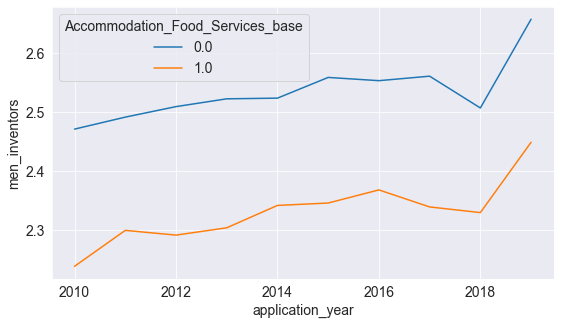

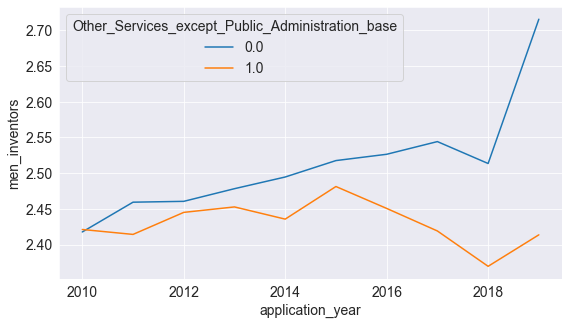

In [8]:
for i in base_data:
    print(i)    
    sex_by_year_and_naics = naics_df.query(f"already_granted == 1").groupby(['application_year', i], as_index = False).\
    agg({'men_inventors':'mean'})

    plt.figure(i)
    sns.lineplot(x = "application_year", y = "men_inventors", data=sex_by_year_and_naics, hue=i)

Agriculture_Forestry_Fishing_Hunting_base
Mining_Quarrying_and_Oil_Gas_Extraction_base
Utilities_base
Construction_base
Manufacturing_base
Wholesale_Trade_base
Retail_Trade_base
Transportation_Warehousing_base
Information_base
Finance_Insurance_base
Real_Estate_Rental_Leasing_base
Professional_Scientific_and_Technical_Services_base
Management_of_Companies_Enterprises_base
Administrative_Support_Waste_Management_Remediation_Services_base
Educational_Services_base
Health_Care_Social_Assistance_base
Arts_Entertainment_and_Recreation_base
Accommodation_Food_Services_base
Other_Services_except_Public_Administration_base


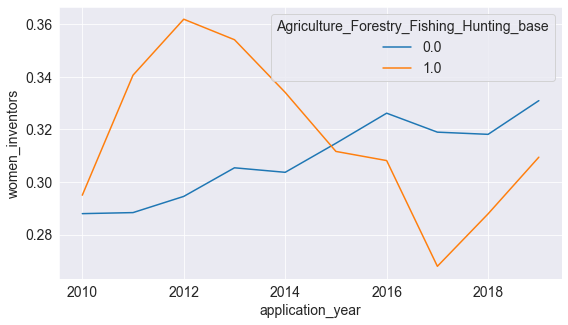

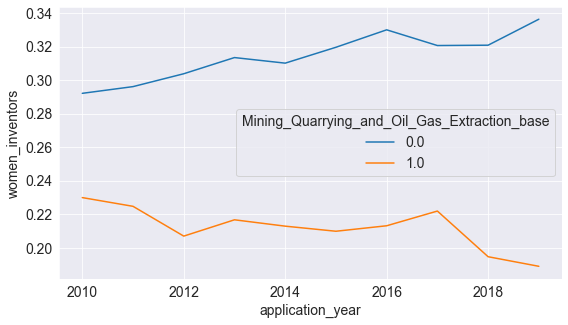

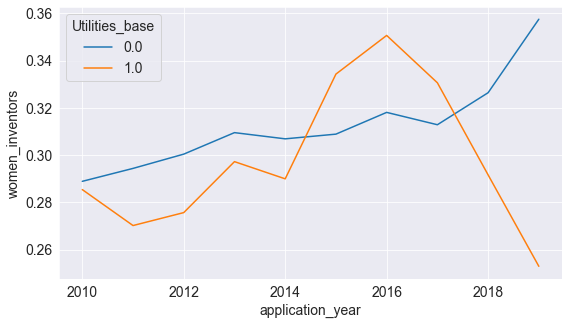

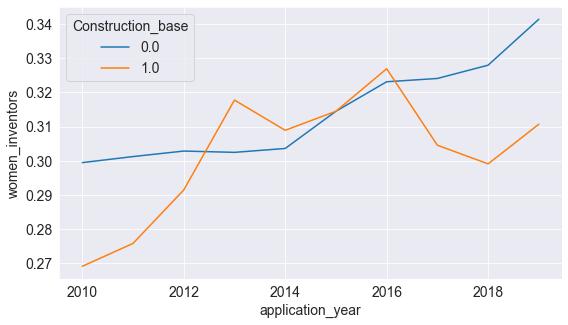

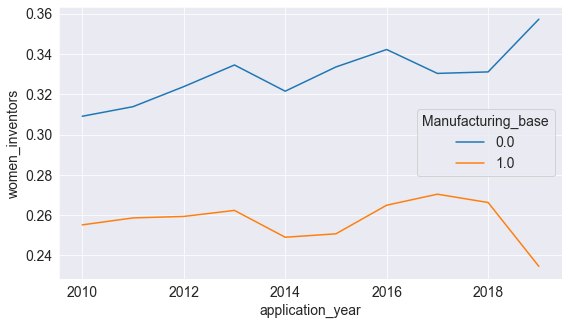

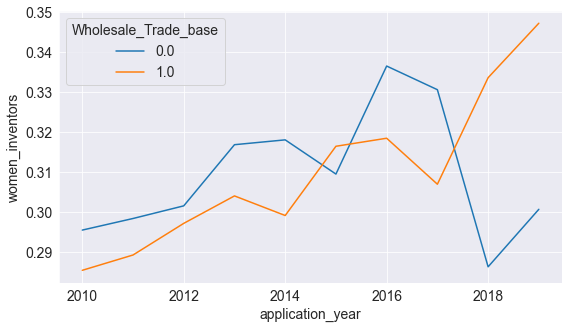

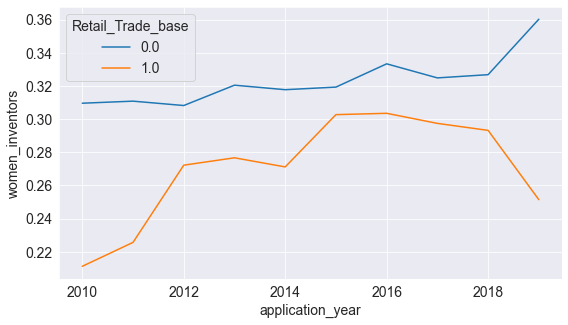

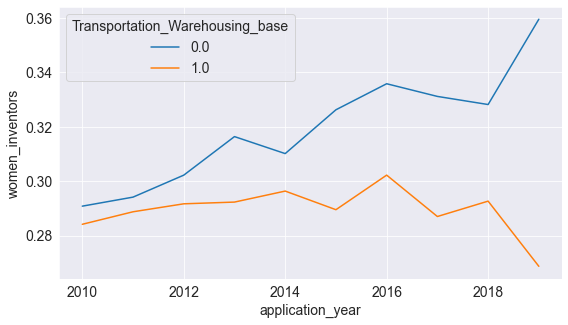

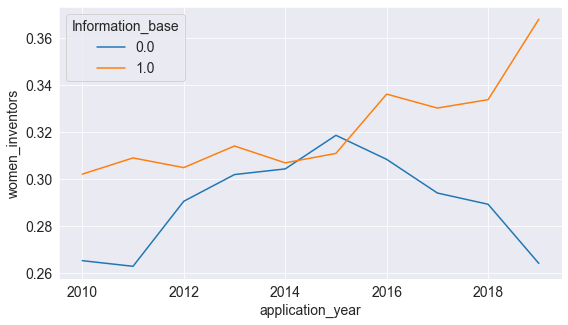

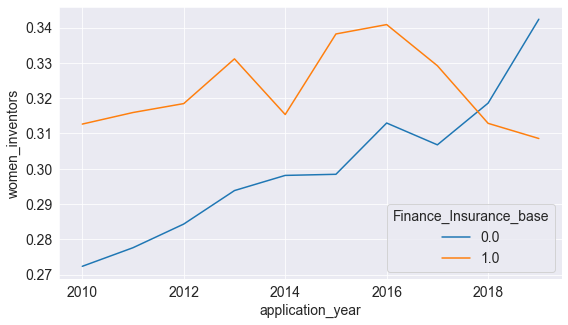

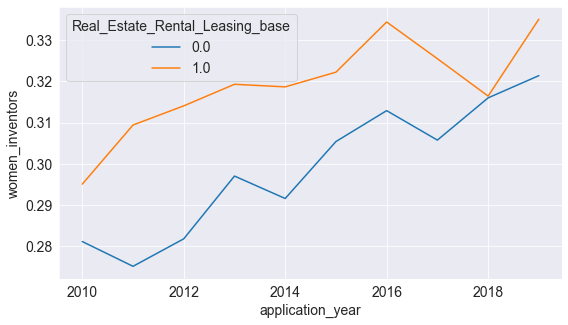

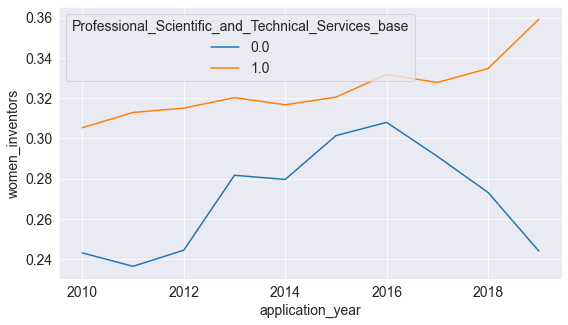

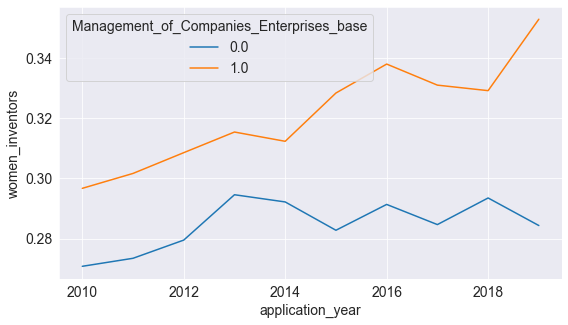

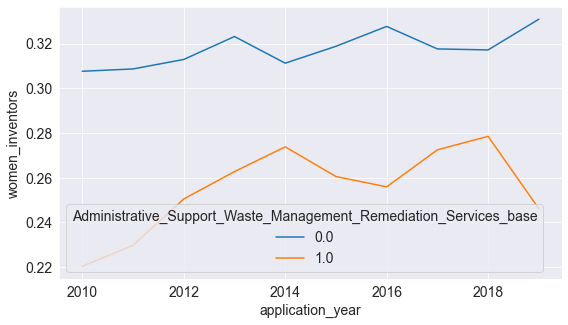

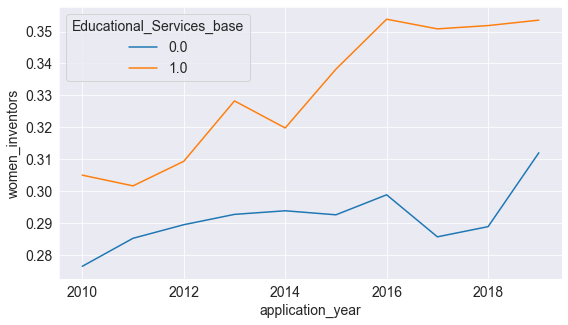

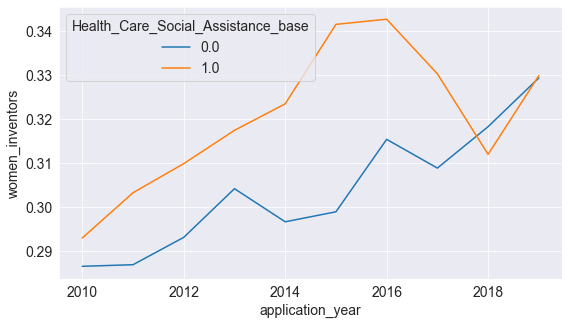

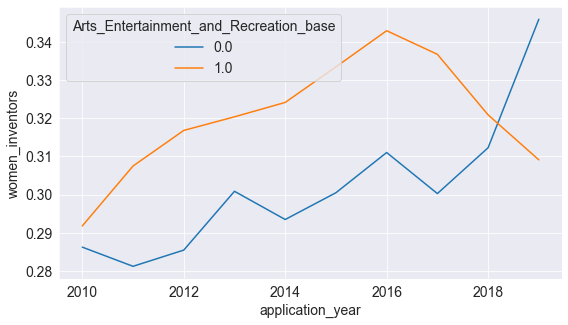

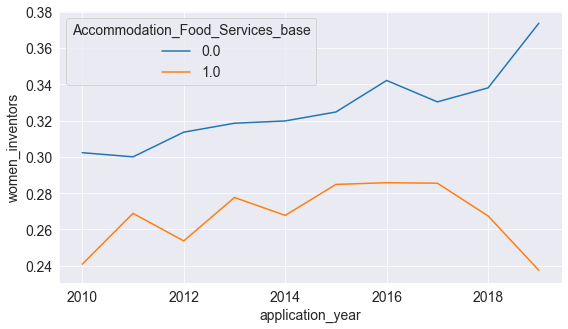

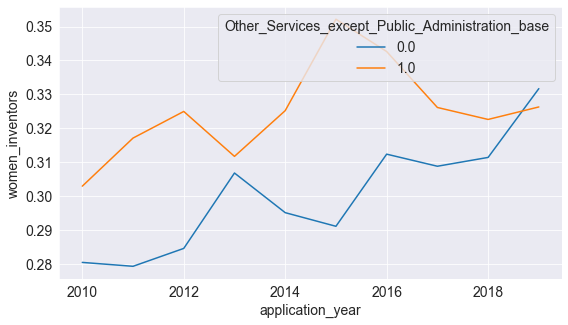

In [10]:
for i in base_data:
    print(i)    
    sex_by_year_and_naics = naics_df.query(f"already_granted == 1").groupby(['application_year', i], as_index = False).\
    agg({'women_inventors':'mean'})

    plt.figure(i)
    sns.lineplot(x = "application_year", y = "women_inventors", data=sex_by_year_and_naics, hue=i)